In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('/content/dataset.csv',header=None)
df

,0,1
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
99995,1,Now need 8 followers to compleate 1000 Follow...
99996,1,I knew I had to explain something to my friend...
99997,1,done tweeting..... til tomorrow..
99998,1,@cmozilo Act II set is pretty breath-taking -L...


In [56]:
# Renaming columns names to make them more readable
df.rename({0:'label',1:'tweet'}, axis = 1, inplace = True)

In [57]:
df

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
99995,1,Now need 8 followers to compleate 1000 Follow...
99996,1,I knew I had to explain something to my friend...
99997,1,done tweeting..... til tomorrow..
99998,1,@cmozilo Act II set is pretty breath-taking -L...


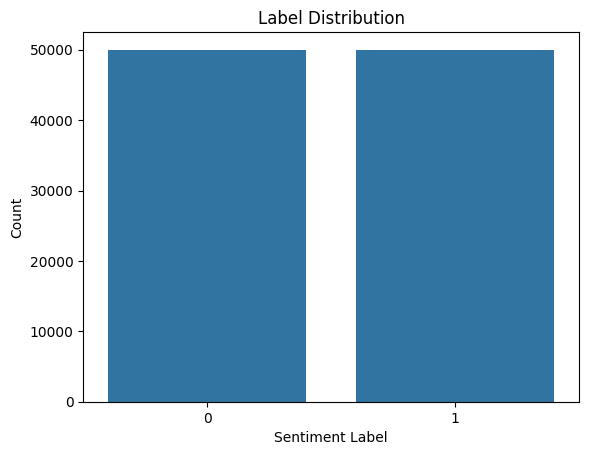

In [58]:
label_counts = df['label'].value_counts()
import seaborn as sns
import matplotlib.pyplot as plt


# Create a bar chart using Seaborn
sns.barplot(x=label_counts.index, y=label_counts.values)

# Add labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Label Distribution')

# Show the plot
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


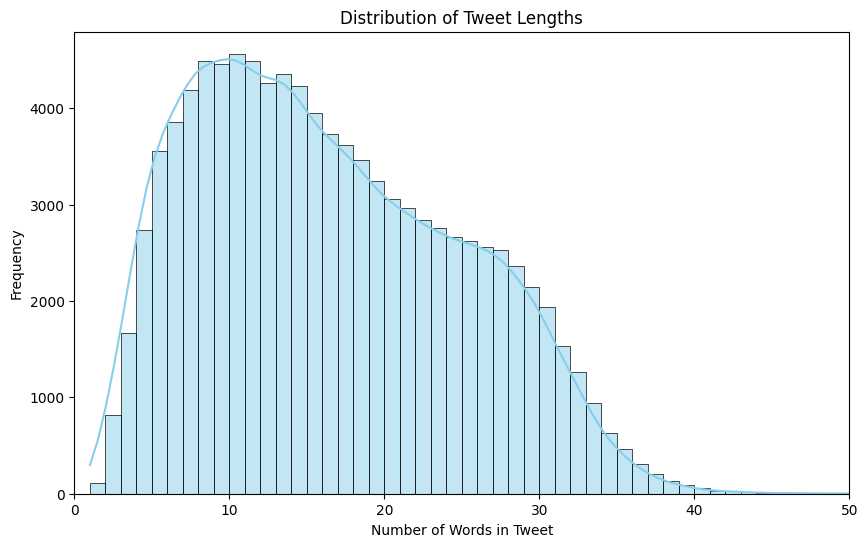

In [59]:
#Visualising the distribution of length of tweets
# Tokenize the tweets to count the number of words
import nltk
import string
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
df['initial_tweet_length'] = df['tweet'].apply(lambda tweet: len(word_tokenize(tweet)))

# Create a histogram of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(df, x='initial_tweet_length', bins=range(1, 51), kde=True, color='skyblue')

# Customize the x-axis limits
plt.xlim(0, 50)

# Customize the plot
plt.xlabel("Number of Words in Tweet")
plt.ylabel("Frequency")
plt.title("Distribution of Tweet Lengths")

# Show the plot
plt.show()


<ipython-input-60-d05ab25f74b7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='Count', data=data_to_plot, palette="Blues")


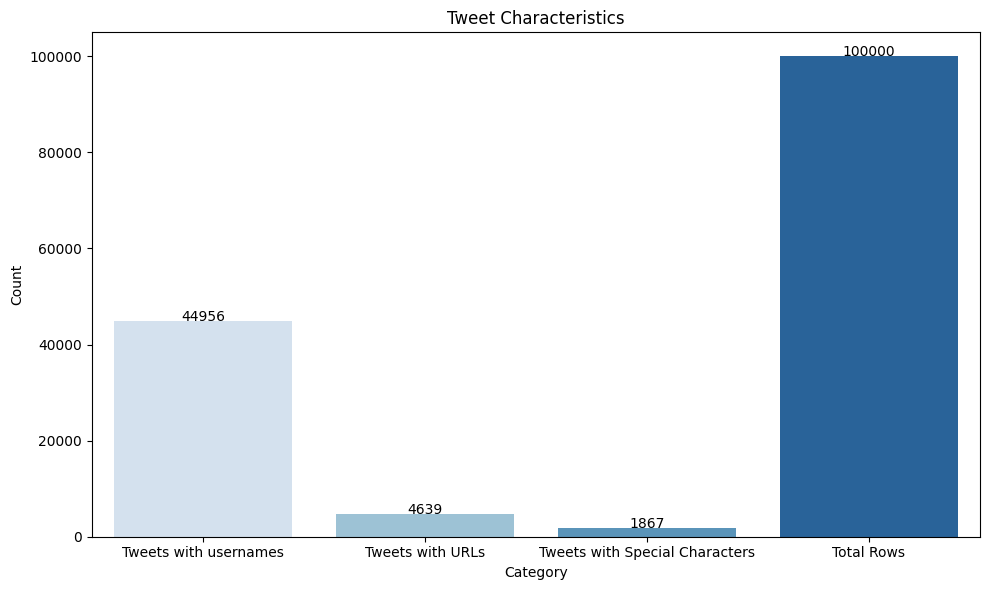

In [60]:
#Visualising number of different characteristic of tweets with respect to the total number of tweets
tweets_with_usernames = sum(df['tweet'].str.contains(r"@[\w]+", regex=True))
tweets_with_urls = sum(df['tweet'].str.contains(r"http\S+|www\S+|https\S+", regex=True))
tweets_with_special_char = sum(df['tweet'].str.contains(r"#", regex=True))

# Calculate the total number of rows
total_rows = len(df)

# Create a DataFrame to store the data
data_to_plot = pd.DataFrame({'Category': ['Tweets with usernames', 'Tweets with URLs', 'Tweets with Special Characters', 'Total Rows'],
                             'Count': [tweets_with_usernames, tweets_with_urls, tweets_with_special_char, total_rows]})

# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(x='Category', y='Count', data=data_to_plot, palette="Blues")

# Add labels and title
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Tweet Characteristics")

# Add count above each bar graph
for bar, count in zip(ax.patches, data_to_plot['Count']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, count, ha='center')

# Show the plot
plt.tight_layout()
plt.show()


In [61]:
#Data Preprocessing
import re
import numpy as np
def remove_usernames(tweet):
    # Define a regex pattern to match usernames
    username_pattern = r'@[\w]+'

    # Use the sub() function to replace all matched usernames with an empty string
    cleaned_tweet = re.sub(username_pattern, '', tweet)

    return cleaned_tweet


In [62]:
df['tweet'] = df['tweet'].apply(remove_usernames)
df.head()

,label,tweet,initial_tweet_length
0,0,"http://twitpic.com/2y1zl - Awww, that's a bum...",27
1,0,is upset that he can't update his Facebook by ...,25
2,0,I dived many times for the ball. Managed to s...,21
3,0,my whole body feels itchy and like its on fire,10
4,0,"no, it's not behaving at all. i'm mad. why am...",30


In [63]:
def remove_urls(text):
    # Use a regular expression to remove URLs
    return re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

In [64]:
df['tweet'] = df['tweet'].apply(remove_urls)
df.head()

,label,tweet,initial_tweet_length
0,0,- A that's a bummer. You shoulda got David ...,27
1,0,is upset that he can't update his Facebook by ...,25
2,0,I dived many times for the ball. Managed to s...,21
3,0,my whole body feels itchy and like its on fire,10
4,0,"no, it's not behaving at all. i'm mad. why am...",30


In [65]:
#Removing Punctuations, Numbers, and Special Characters

df['tweet'] = df['tweet'].str.replace("[^a-zA-Z#]", " ")
df['tweet'] = df['tweet'].str.replace("#", "")
df.head()

<ipython-input-65-0040ef64dcaa>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace("[^a-zA-Z#]", " ")


,label,tweet,initial_tweet_length
0,0,A that s a bummer You shoulda got David ...,27
1,0,is upset that he can t update his Facebook by ...,25
2,0,I dived many times for the ball Managed to s...,21
3,0,my whole body feels itchy and like its on fire,10
4,0,no it s not behaving at all i m mad why am...,30


In [66]:
#Tokenization
df["tweet"] = df["tweet"].apply(lambda x: x.split())
df.head()


,label,tweet,initial_tweet_length
0,0,"[A, that, s, a, bummer, You, shoulda, got, Dav...",27
1,0,"[is, upset, that, he, can, t, update, his, Fac...",25
2,0,"[I, dived, many, times, for, the, ball, Manage...",21
3,0,"[my, whole, body, feels, itchy, and, like, its...",10
4,0,"[no, it, s, not, behaving, at, all, i, m, mad,...",30


In [67]:
#Stemming and Lemmatization
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
df["tweet"] = df["tweet"].apply(lambda x: [stemmer.stem(i) for i in x])
df.head()



,label,tweet,initial_tweet_length
0,0,"[a, that, s, a, bummer, you, shoulda, got, dav...",27
1,0,"[is, upset, that, he, can, t, updat, his, face...",25
2,0,"[i, dive, mani, time, for, the, ball, manag, t...",21
3,0,"[my, whole, bodi, feel, itchi, and, like, it, ...",10
4,0,"[no, it, s, not, behav, at, all, i, m, mad, wh...",30


In [69]:
#Removing Stopwords
nltk.download('stopwords')


# Define a list of stopwords for text processing
stopwords = nltk.corpus.stopwords.words("english")

def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
df['tweet'] = df['tweet'].apply(process)
df.head()


,label,tweet,initial_tweet_length
0,0,"[day, bummer, carr, third, shoulda, david, got]",27
1,0,"[upset, text, today, cri, school, also, facebo...",25
2,0,"[time, manag, go, bound, save, rest, ball, div...",21
3,0,"[bodi, feel, itchi, fire, like, whole]",10
4,0,"[see, mad, becaus, whi, behav]",30


In [ ]:
#
#Data Visualisation (After Preprocessing)
#Visualising most common words across entire preprocessed dataset

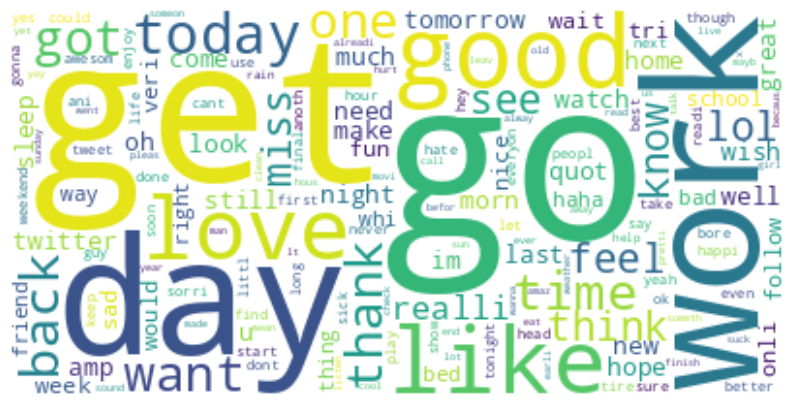

In [74]:
# get individual words
from collections import Counter

# Import libraries for natural language processing
from wordcloud import WordCloud

words = []
for line in df["tweet"]:
    words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color="white",
    max_words=500,
    stopwords=stopwords
    ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


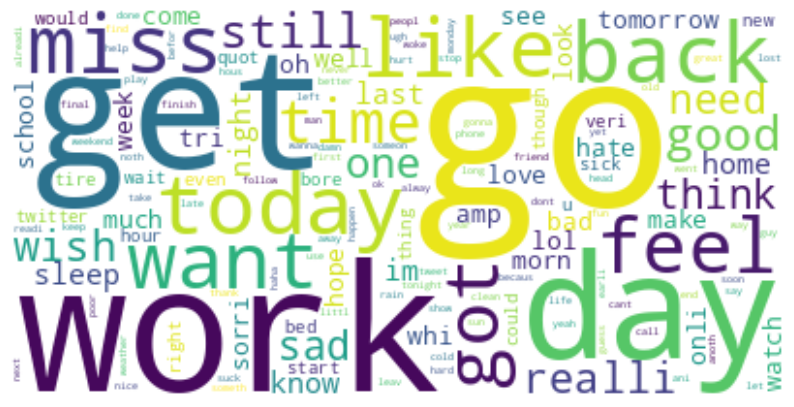

In [77]:
#Visualising most common words that are being labelled as 'Negative'
# get individual words
words = []
for line in df['tweet'][df['label']==0]:
    words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color="white",
    max_words=500,
    stopwords=stopwords
    ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


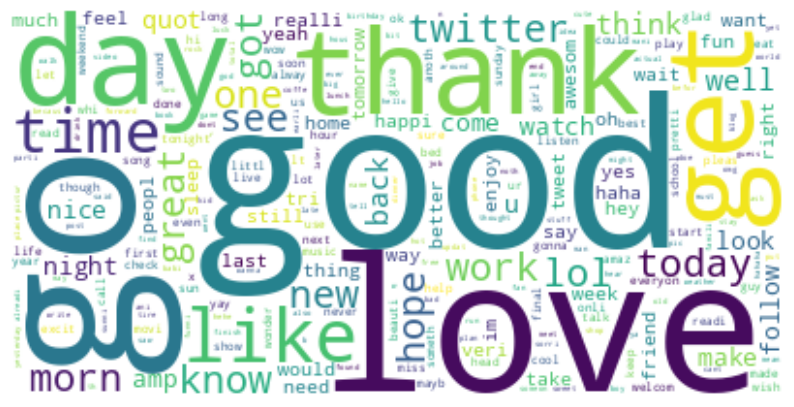

In [79]:
#Visualising most common words that are being labelled as 'Positive'
# get individual words
words = []
for line in df['tweet'][df['label']==1]:
    words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color="white",
    max_words=500,
    stopwords=stopwords
    ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()